In [1]:
import keras
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
#데이터셋 텍스트로 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

train_labels[10]

3

In [5]:
# 데이터 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

In [6]:
# 레이블 -> 벡터 : 원-핫 인코딩(범주형 인코딩)
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
# 모델 정의
from keras import models
from keras import layers

model = models.Sequential()
# 출력이 46클래스로 나뉘니까 유닛 갯수를 좀 더 크게 (64차원으로)
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
# softmax -> class[i]에 속할 확률 출력
model.add(layers.Dense(46, activation='softmax')) # 출력 클래스 갯수 46개

Metal device set to: Apple M1


2022-03-14 14:42:39.998385: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-14 14:42:39.998468: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy', # 두 확률분포 사이의 거리 측정 -> 거리 최소화 => 진짜 레이블에 가까운 출력 내도록
             metrics= ['accuracy'])

In [9]:
# 검증 세트 준비
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
# 모델 훈련
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20


2022-03-14 14:42:40.296940: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 6/16 [==========>...................] - ETA: 0s - loss: 3.2849 - accuracy: 0.4479

2022-03-14 14:42:40.537455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 21ms/step - loss: 2.5746 - accuracy: 0.5390 - val_loss: 1.6878 - val_accuracy: 0.6340
Epoch 2/20
11/16 [===================>..........] - ETA: 0s - loss: 1.4325 - accuracy: 0.7005

2022-03-14 14:42:40.937258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 12ms/step - loss: 1.3764 - accuracy: 0.7091 - val_loss: 1.2624 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0163 - accuracy: 0.7821 - val_loss: 1.1126 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7968 - accuracy: 0.8285 - val_loss: 1.0115 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6295 - accuracy: 0.8643 - val_loss: 0.9489 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4983 - accuracy: 0.8959 - val_loss: 0.9205 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.3970 - accuracy: 0.9162 - val_loss: 0.9146 - val_accuracy: 0.8010
Epoch 8/20
16/16 [==============================] - 0s 12ms/step - loss: 0.3250 - accuracy: 0.9286 - val_loss: 0.8932 - val_accuracy: 0.8210
Epoch 9/20
16/16 [======

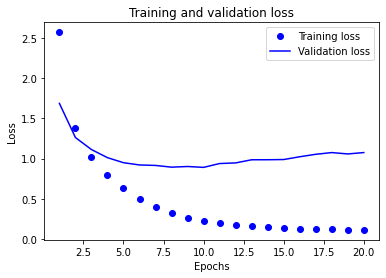

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

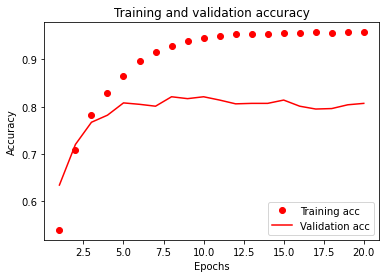

In [16]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
# 처음부터 다시 훈련..
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) 

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9, # 9번 이후 과대적합 시작 -> 9번 에포크로 줄이기
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
 6/16 [==========>...................] - ETA: 0s - loss: 3.2756 - accuracy: 0.4346

2022-03-14 14:49:56.856455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 21ms/step - loss: 2.5407 - accuracy: 0.5421 - val_loss: 1.6784 - val_accuracy: 0.6500
Epoch 2/9
12/16 [=====================>........] - ETA: 0s - loss: 1.4320 - accuracy: 0.6984

2022-03-14 14:49:57.242150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 12ms/step - loss: 1.3680 - accuracy: 0.7107 - val_loss: 1.2799 - val_accuracy: 0.6930
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 1.0144 - accuracy: 0.7841 - val_loss: 1.1030 - val_accuracy: 0.7700
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8043 - accuracy: 0.8285 - val_loss: 1.0097 - val_accuracy: 0.7850
Epoch 5/9
16/16 [==============================] - 0s 13ms/step - loss: 0.6327 - accuracy: 0.8648 - val_loss: 0.9767 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 0s 12ms/step - loss: 0.5033 - accuracy: 0.8951 - val_loss: 0.9403 - val_accuracy: 0.7910
Epoch 7/9
16/16 [==============================] - 0s 12ms/step - loss: 0.4097 - accuracy: 0.9148 - val_loss: 0.8942 - val_accuracy: 0.8090
Epoch 8/9
16/16 [==============================] - 0s 12ms/step - loss: 0.3287 - accuracy: 0.9278 - val_loss: 0.8817 - val_accuracy: 0.8140
Epoch 9/9
71/71 [=============

In [18]:
results

[0.9931504726409912, 0.7845057845115662]

In [20]:
predictions= model.predict(x_test)

print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.99999994
3


In [23]:
# 병목 모델
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu')) # 작은 중간층 -> 손실된 정보 많아짐
model.add(layers.Dense(46, activation='softmax')) 

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/20
 6/16 [==========>...................] - ETA: 0s - loss: 3.7388 - accuracy: 0.0339

2022-03-14 15:05:26.229109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 20ms/step - loss: 3.6051 - accuracy: 0.0294 - val_loss: 3.4164 - val_accuracy: 0.0610
Epoch 2/20
11/16 [===================>..........] - ETA: 0s - loss: 3.2733 - accuracy: 0.1919

2022-03-14 15:05:26.604818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 12ms/step - loss: 3.2239 - accuracy: 0.2200 - val_loss: 3.0900 - val_accuracy: 0.2810
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 2.8771 - accuracy: 0.3084 - val_loss: 2.8148 - val_accuracy: 0.2870
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 2.5926 - accuracy: 0.3188 - val_loss: 2.6051 - val_accuracy: 0.2940
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 2.3657 - accuracy: 0.3236 - val_loss: 2.4255 - val_accuracy: 0.2900
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 2.1433 - accuracy: 0.3290 - val_loss: 2.2260 - val_accuracy: 0.2990
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 1.8914 - accuracy: 0.3353 - val_loss: 1.9935 - val_accuracy: 0.2980
Epoch 8/20
16/16 [==============================] - 0s 12ms/step - loss: 1.6136 - accuracy: 0.5106 - val_loss: 1.7477 - val_accuracy: 0.6290
Epoch 9/20
16/16 [======